In [2]:
import redback
import numpy as np
import pandas as pd
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.lines import Line2D

No module named 'lalsimulation'
lalsimulation is not installed. Some EOS based models will not work. Please use bilby eos or pass your own EOS generation class to the model


In [3]:
bands = ['lsstg', 'lsstr', 'lssti','lsstz','lssty', 'lsstu', 'uvot::uvw1']
frequency=[5e9, 2e17]
bandfreqs = (redback.utils.bands_to_frequency(bands))
frequency.extend(bandfreqs)
frequency.sort()
frequency

[5000000000.0,
 308738116672272.25,
 344949774531146.6,
 397287890568202.3,
 481730482385753.06,
 621093082892117.8,
 816711949886849.0,
 1146839759677006.2,
 2e+17]

Text(0, 0.5, 'Flux Density (mJy)')

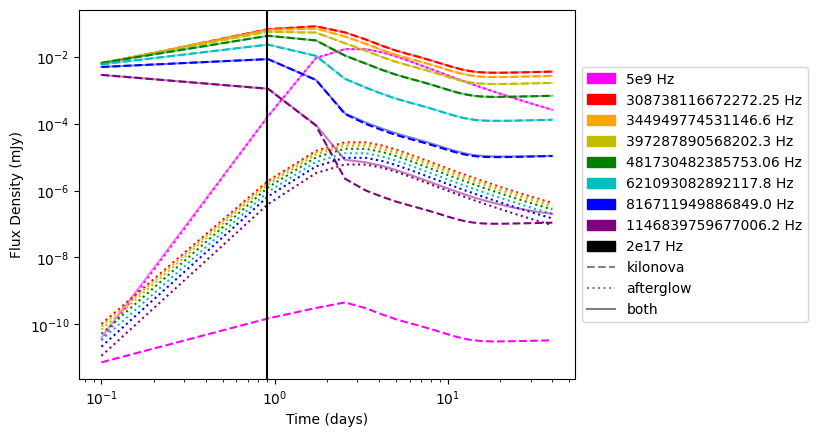

In [27]:
#tophat jet and two component kilonova
time= np.linspace(0.1,40,50)
colour=['magenta','r', 'orange', 'y', 'g', 'c', 'b', 'purple', 'k']
ax= plt.subplot()

for i in range(9):
    
    kn_fluxd = redback.transient_models.extinction_models.extinction_with_kilonova_base_model(time=time, redshift=0.01, av=0.5,
        base_model='two_component_kilonova_model', mej_1=0.015, mej_2=0.015, vej_1=0.15, vej_2=0.35, kappa_1=1, kappa_2=25, 
        temperature_floor_1=3000, temperature_floor_2=3000, output_format='flux_density', frequency=frequency[i] )


    ag_fluxd = redback.transient_models.extinction_models.extinction_with_afterglow_base_model(time=time, redshift=0.01, av=0.5,
        base_model='tophat',  thv= 0.5, loge0=50.0 , thc= 0.02, logn0=1, p=2.13, logepse=-1.25, logepsb=-2.5, ksin=1, g0=1000,
        output_format='flux_density', frequency=frequency[i])
   # print(ag_fluxd)
    combined= ag_fluxd + kn_fluxd
    
    ax.loglog(time, kn_fluxd, ls='dashed', color=colour[i])
    ax.loglog(time, ag_fluxd, ls='dotted', color=colour[i])
    ax.loglog(time, combined, ls= 'solid', color=colour[i], alpha=0.5)

#legend formatting
f1 = mpatches.Patch(color='magenta', label='5e9 Hz')
f2 = mpatches.Patch(color='r', label='308738116672272.25 Hz')
f3 = mpatches.Patch(color='orange', label='344949774531146.6 Hz')
f4 = mpatches.Patch(color='y', label='397287890568202.3 Hz')
f5 = mpatches.Patch(color='g', label='481730482385753.06 Hz')
f6 = mpatches.Patch(color='c', label='621093082892117.8 Hz')
f7 = mpatches.Patch(color='b', label='816711949886849.0 Hz')
f8 = mpatches.Patch(color='purple', label='1146839759677006.2 Hz')
f9 = mpatches.Patch(color='k', label='2e17 Hz')
kn = Line2D([0],[0],color='grey', ls='dashed', label='kilonova')
ag = Line2D([0],[0],color='grey', ls='dotted',label='afterglow')
both = Line2D([0],[0],color='grey',ls='solid', label='both')

ax.axvline(x=0.9, color='k')

ax.legend(handles=[f1,f2,f3,f4,f5,f6,f7,f8,f9,kn,ag,both],loc='center left', bbox_to_anchor=(1, 0.5))
ax.set_xlabel('Time (days)')
ax.set_ylabel('Flux Density (mJy)')
#plt.ylim(1e-8,10)
#plt.xlim(-1,30)

(1e-08, 100.0)

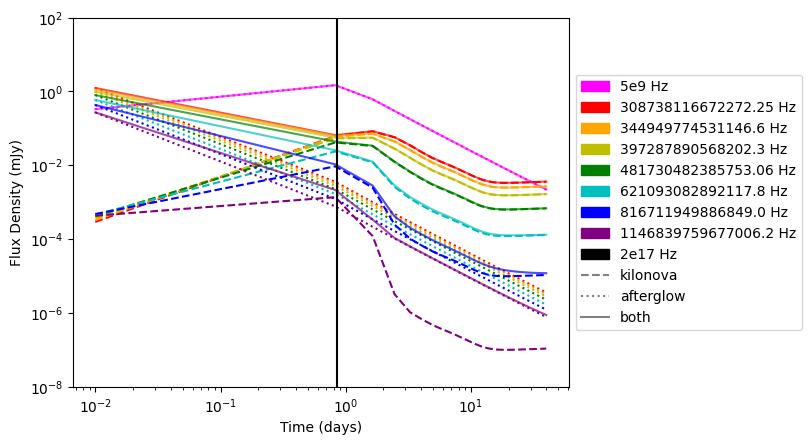

In [62]:
#powerlawcore jet and two component kn
time= np.linspace(0.01,40,50)
colour=['magenta','r', 'orange', 'y', 'g', 'c', 'b', 'purple', 'k']
ax= plt.subplot()

for i in range(9):
    
    kn_fluxd = redback.transient_models.extinction_models.extinction_with_kilonova_base_model(time=time, redshift=0.01, av=0.5,
        base_model='two_component_kilonova_model', mej_1=0.015, mej_2=0.015, vej_1=0.15, vej_2=0.35, kappa_1=1, kappa_2=25, 
        temperature_floor_1=3000, temperature_floor_2=3000, output_format='flux_density', frequency=frequency[i] )


    ag_fluxd = redback.transient_models.extinction_models.extinction_with_afterglow_base_model(time=time, redshift=0.01, av=0.5,
        base_model='powerlawcore',  thv= 0.0, loge0=51.0 , thc= 0.03, logn0=-3.1, p=2.13, logepse=-1.25, logepsb=-2.5, ksin=0.4, g0=1000, thw=2,
        beta= 4, output_format='flux_density', frequency=frequency[i])

    combined= ag_fluxd + kn_fluxd
    
    ax.loglog(time, kn_fluxd, ls='dashed', color=colour[i])
    ax.loglog(time, ag_fluxd, ls='dotted', color=colour[i])
    ax.loglog(time, combined, ls= 'solid', color=colour[i], alpha=0.7)

#legend formatting
f1 = mpatches.Patch(color='magenta', label='5e9 Hz')
f2 = mpatches.Patch(color='r', label='308738116672272.25 Hz')
f3 = mpatches.Patch(color='orange', label='344949774531146.6 Hz')
f4 = mpatches.Patch(color='y', label='397287890568202.3 Hz')
f5 = mpatches.Patch(color='g', label='481730482385753.06 Hz')
f6 = mpatches.Patch(color='c', label='621093082892117.8 Hz')
f7 = mpatches.Patch(color='b', label='816711949886849.0 Hz')
f8 = mpatches.Patch(color='purple', label='1146839759677006.2 Hz')
f9 = mpatches.Patch(color='k', label='2e17 Hz')
kn = Line2D([0],[0],color='grey', ls='dashed', label='kilonova')
ag = Line2D([0],[0],color='grey', ls='dotted',label='afterglow')
both = Line2D([0],[0],color='grey',ls='solid', label='both')

ax.axvline(x=0.85, color='k')

ax.legend(handles=[f1,f2,f3,f4,f5,f6,f7,f8,f9,kn,ag,both],loc='center left', bbox_to_anchor=(1, 0.5))
ax.set_xlabel('Time (days)')
ax.set_ylabel('Flux Density (mJy)')
plt.ylim(1e-8,1e2)   
#plt.xlim(-1,20)

(1e-09, 100.0)

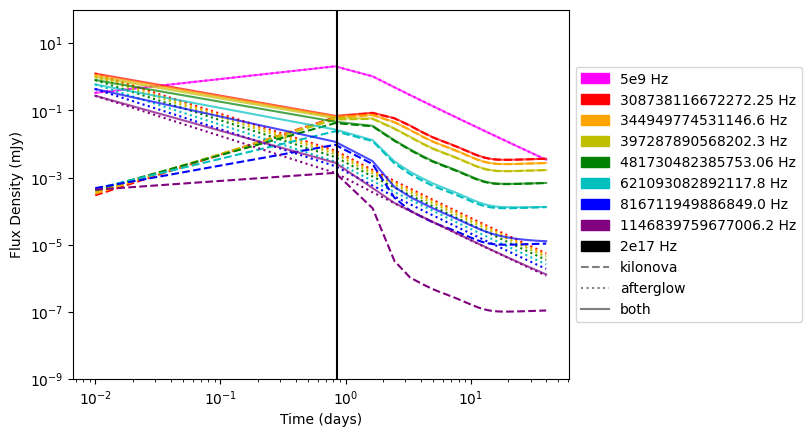

In [63]:
#gaussian core jet and two component kn
time= np.linspace(0.01,40,50)
colour=['magenta','r', 'orange', 'y', 'g', 'c', 'b', 'purple', 'k']
ax= plt.subplot()

for i in range(9):
    
    kn_fluxd = redback.transient_models.extinction_models.extinction_with_kilonova_base_model(time=time, redshift=0.01, av=0.5,
        base_model='two_component_kilonova_model', mej_1=0.015, mej_2=0.015, vej_1=0.15, vej_2=0.35, kappa_1=1, kappa_2=25, 
        temperature_floor_1=3000, temperature_floor_2=3000, output_format='flux_density', frequency=frequency[i] )


    ag_fluxd = redback.transient_models.extinction_models.extinction_with_afterglow_base_model(time=time, redshift=0.01, av=0.5,
        base_model='gaussiancore',  thv= 0.0, loge0=51.0 , thc= 0.03, logn0=-3.1, p=2.13, logepse=-1.25, logepsb=-2.5, ksin=0.4, g0=1000, thw=2,
        beta= 4, output_format='flux_density', frequency=frequency[i])

    combined= ag_fluxd + kn_fluxd
    
    ax.loglog(time, kn_fluxd, ls='dashed', color=colour[i])
    ax.loglog(time, ag_fluxd, ls='dotted', color=colour[i])
    ax.loglog(time, combined, ls= 'solid', color=colour[i], alpha=0.7)
    

#legend formatting
f1 = mpatches.Patch(color='magenta', label='5e9 Hz')
f2 = mpatches.Patch(color='r', label='308738116672272.25 Hz')
f3 = mpatches.Patch(color='orange', label='344949774531146.6 Hz')
f4 = mpatches.Patch(color='y', label='397287890568202.3 Hz')
f5 = mpatches.Patch(color='g', label='481730482385753.06 Hz')
f6 = mpatches.Patch(color='c', label='621093082892117.8 Hz')
f7 = mpatches.Patch(color='b', label='816711949886849.0 Hz')
f8 = mpatches.Patch(color='purple', label='1146839759677006.2 Hz')
f9 = mpatches.Patch(color='k', label='2e17 Hz')
kn = Line2D([0],[0],color='grey', ls='dashed', label='kilonova')
ag = Line2D([0],[0],color='grey', ls='dotted',label='afterglow')
both = Line2D([0],[0],color='grey',ls='solid', label='both')

ax.axvline(x=0.85, color='k')

ax.legend(handles=[f1,f2,f3,f4,f5,f6,f7,f8,f9,kn,ag,both], loc='center left', bbox_to_anchor=(1, 0.5))
ax.set_xlabel('Time (days)')
ax.set_ylabel('Flux Density (mJy)')
plt.ylim(1e-9,1e2)   
#plt.xlim(0,5)

44.467777777777776
44.467777777777776
44.467777777777776
44.467777777777776
44.467777777777776
44.467777777777776
44.467777777777776
44.467777777777776
0.03


(1e-12, 100.0)

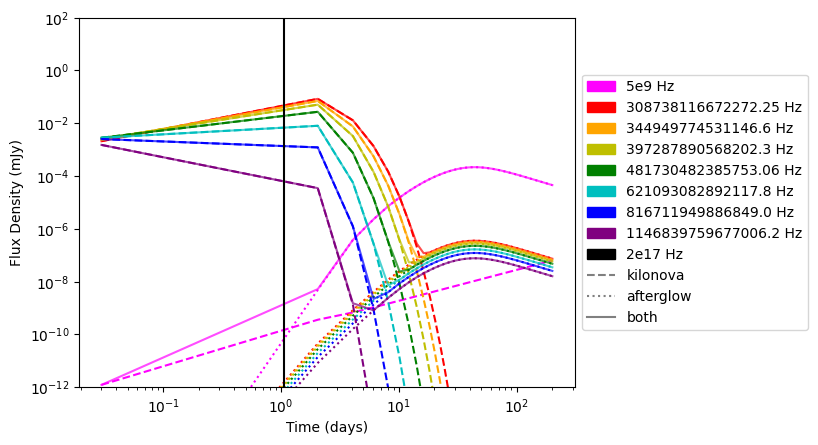

In [46]:
#powerlawcore jet and stratified kn
time= np.linspace(0.03,200,100)
colour=['magenta','r', 'orange', 'y', 'g', 'c', 'b', 'purple', 'k']
ax= plt.subplot()

for i in range(9):
    
    kn_fluxd = redback.transient_models.extinction_models.extinction_with_kilonova_base_model(time=time, redshift=0.01, av=0.5,
        base_model='two_layer_stratified_kilonova', mej=0.01, vej_1=0.15, vej_2=0.35, kappa=1, beta=8, 
        output_format='flux_density', frequency=frequency[i] )


    ag_fluxd = redback.transient_models.extinction_models.extinction_with_afterglow_base_model(time=time, redshift=0.01, av=0.5,
        base_model='powerlawcore',  thv=1.3 , loge0=49.9 , thc= 0.03, logn0=0.38, p=2.13, logepse=-1.25, logepsb=-2.5, ksin=1, g0=1000, thw=2,
        beta= 4, output_format='flux_density', frequency=frequency[i])
    print(time[np.argmax(ag_fluxd)])
    combined= ag_fluxd + kn_fluxd
    
    ax.loglog(time, kn_fluxd, ls='dashed', color=colour[i])
    ax.loglog(time, ag_fluxd, ls='dotted', color=colour[i])
    ax.loglog(time, combined, ls= 'solid', color=colour[i], alpha=0.7)
    

#legend formatting
f1 = mpatches.Patch(color='magenta', label='5e9 Hz')
f2 = mpatches.Patch(color='r', label='308738116672272.25 Hz')
f3 = mpatches.Patch(color='orange', label='344949774531146.6 Hz')
f4 = mpatches.Patch(color='y', label='397287890568202.3 Hz')
f5 = mpatches.Patch(color='g', label='481730482385753.06 Hz')
f6 = mpatches.Patch(color='c', label='621093082892117.8 Hz')
f7 = mpatches.Patch(color='b', label='816711949886849.0 Hz')
f8 = mpatches.Patch(color='purple', label='1146839759677006.2 Hz')
f9 = mpatches.Patch(color='k', label='2e17 Hz')
kn = Line2D([0],[0],color='grey', ls='dashed', label='kilonova')
ag = Line2D([0],[0],color='grey', ls='dotted',label='afterglow')
both = Line2D([0],[0],color='grey',ls='solid', label='both')

ax.axvline(x=1.05, color='k')

ax.legend(handles=[f1,f2,f3,f4,f5,f6,f7,f8,f9,kn,ag,both],loc='center left', bbox_to_anchor=(1, 0.5))
ax.set_xlabel('Time (days)')
ax.set_ylabel('Flux Density (mJy)')
plt.ylim(1e-12,1e2)   
#plt.xlim(-1,15)

(1e-08, 100.0)

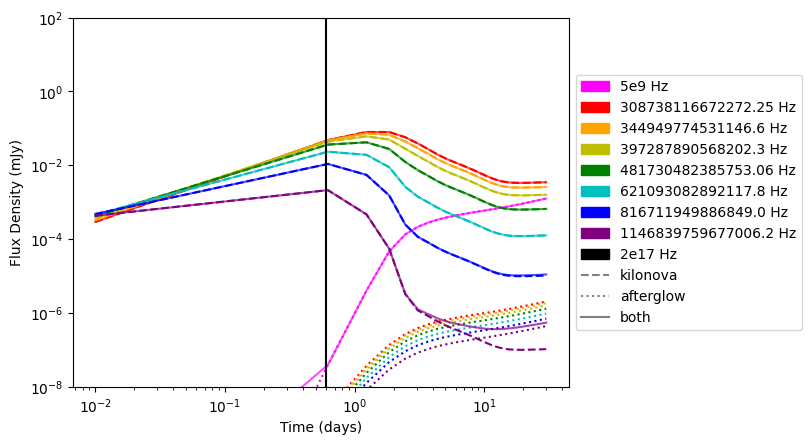

In [13]:
#smooth power law jet and two component kn
time= np.linspace(0.01,30,50)
colour=['magenta','r', 'orange', 'y', 'g', 'c', 'b', 'purple', 'k']
ax= plt.subplot()

for i in range(9):
    
    kn_fluxd = redback.transient_models.extinction_models.extinction_with_kilonova_base_model(time=time, redshift=0.01, av=0.5,
        base_model='two_component_kilonova_model', mej_1=0.015, mej_2=0.015, vej_1=0.15, vej_2=0.35, kappa_1=1, kappa_2=25, 
        temperature_floor_1=3000, temperature_floor_2=3000, output_format='flux_density', frequency=frequency[i] )


    ag_fluxd = redback.transient_models.extinction_models.extinction_with_afterglow_base_model(time=time, redshift=0.01, av=0.5,
        base_model='smoothpowerlaw',  thv= 0.4, loge0=51.0 , thc= 0.03, logn0=-3.2, p=2.13, logepse=-1.25, logepsb=-2.5, ksin=0.4, g0=1000, thw=7,
        beta= 4, output_format='flux_density', frequency=frequency[i])

    combined= ag_fluxd + kn_fluxd
    
    ax.loglog(time, kn_fluxd, ls='dashed', color=colour[i])
    ax.loglog(time, ag_fluxd, ls='dotted', color=colour[i])
    ax.loglog(time, combined, ls= 'solid', color=colour[i], alpha=0.7)

#legend formatting
f1 = mpatches.Patch(color='magenta', label='5e9 Hz')
f2 = mpatches.Patch(color='r', label='308738116672272.25 Hz')
f3 = mpatches.Patch(color='orange', label='344949774531146.6 Hz')
f4 = mpatches.Patch(color='y', label='397287890568202.3 Hz')
f5 = mpatches.Patch(color='g', label='481730482385753.06 Hz')
f6 = mpatches.Patch(color='c', label='621093082892117.8 Hz')
f7 = mpatches.Patch(color='b', label='816711949886849.0 Hz')
f8 = mpatches.Patch(color='purple', label='1146839759677006.2 Hz')
f9 = mpatches.Patch(color='k', label='2e17 Hz')
kn = Line2D([0],[0],color='grey', ls='dashed', label='kilonova')
ag = Line2D([0],[0],color='grey', ls='dotted',label='afterglow')
both = Line2D([0],[0],color='grey',ls='solid', label='both')

ax.axvline(x=0.6, color='k')

ax.legend(handles=[f1,f2,f3,f4,f5,f6,f7,f8,f9,kn,ag,both],loc='center left', bbox_to_anchor=(1, 0.5))
ax.set_xlabel('Time (days)')
ax.set_ylabel('Flux Density (mJy)')
plt.ylim(1e-8,1e2)   
#plt.xlim(0,20)

(1e-10, 100.0)

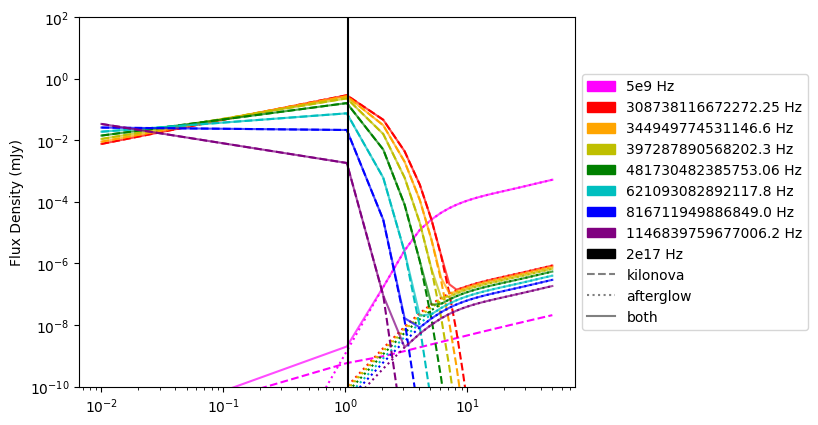

In [10]:
#smooth power law jet and metzger kn
time= np.linspace(0.01,50,50)
colour=['magenta','r', 'orange', 'y', 'g', 'c', 'b', 'purple', 'k']
ax= plt.subplot()

for i in range(9):
    
    kn_fluxd = redback.transient_models.extinction_models.extinction_with_kilonova_base_model(time=time, redshift=0.01, av=0.5,
        base_model='metzger_kilonova_model', mej=0.02, vej=0.33, kappa=12, beta=4,
        output_format='flux_density', frequency=frequency[i] )


    ag_fluxd = redback.transient_models.extinction_models.extinction_with_afterglow_base_model(time=time, redshift=0.01, av=0.5,
        base_model='smoothpowerlaw',  thv= 0.5, loge0=51.0 , thc= 0.03, logn0=-3.1, p=2.13, logepse=-1.25, logepsb=-2.5, ksin=0.4, g0=1000, thw=7,
        beta= 4, output_format='flux_density', frequency=frequency[i])

    combined= ag_fluxd + kn_fluxd
    
    ax.loglog(time, kn_fluxd, ls='dashed', color=colour[i])
    ax.loglog(time, ag_fluxd, ls='dotted', color=colour[i])
    ax.loglog(time, combined, ls= 'solid', color=colour[i], alpha=0.7)

#legend formatting
f1 = mpatches.Patch(color='magenta', label='5e9 Hz')
f2 = mpatches.Patch(color='r', label='308738116672272.25 Hz')
f3 = mpatches.Patch(color='orange', label='344949774531146.6 Hz')
f4 = mpatches.Patch(color='y', label='397287890568202.3 Hz')
f5 = mpatches.Patch(color='g', label='481730482385753.06 Hz')
f6 = mpatches.Patch(color='c', label='621093082892117.8 Hz')
f7 = mpatches.Patch(color='b', label='816711949886849.0 Hz')
f8 = mpatches.Patch(color='purple', label='1146839759677006.2 Hz')
f9 = mpatches.Patch(color='k', label='2e17 Hz')
kn = Line2D([0],[0],color='grey', ls='dashed', label='kilonova')
ag = Line2D([0],[0],color='grey', ls='dotted',label='afterglow')
both = Line2D([0],[0],color='grey',ls='solid', label='both')

ax.axvline(x=1.06, color='k')

ax.legend(handles=[f1,f2,f3,f4,f5,f6,f7,f8,f9,kn,ag,both],loc='center left', bbox_to_anchor=(1, 0.5))
##ax.set_xlabel('Time (days)')
ax.set_ylabel('Flux Density (mJy)')
plt.ylim(1e-10,1e2)   
#plt.xlim(0,20)

### Summary of initial parameter tests and how they affect thv

thv is possibly biggest determining factor for if the ag and kn signals can be distinguished from each other.'Distinguishable' by eye = observation of the both line as a 'rise fall rise' or 'fall rise fall' indicating two peaks from the kn and ag. Initial parameter tests aimed to see how altering the parameters changed the required thv range for distinguishability.

* thc: increasing shifts nececcary thv to higher values and extends range slightly

* logepse/logepsb: if both very negative (e.g. -4) then may not be able to distinguish signals at all under some conditions. The  range of thv is slightly larger if logepse is greater than logepseb (e.g. -1 vs -4) than if logepseb is greater than logepse. In general lower/more -ve values leads to lower max thv value

* kappa_1: increased blue component kappa extends distinguishability range for thv in the visible particularly

* logn0: higher ism density shifts and extends thv range to higher values significantly

* thw: increasing thw doesn't shift thv range noticibly but extends it particularly in the UV

* loge0: Needs to be sufficiently large so that the flux densities are comparable. Increasing loge0 slightly decreases the max thv value

Stratified kilonova falls away so steeply so quickly that if resolution of flux density was not a consideration then only min thv would be necessary and thw would be somewhat redundant. Realistically thv max value set by resolution rather than specific parameters.

* kappa: increasing shifts min thv slightly to higher value

* beta: increasing shifts min thv slightly to higher value

* mej: increasing mass decreases sharp flux gradient slightly so coincides with afterglow curve at later time



maybe consider?
* are any of the parameters realistically dependant on each other significantly? 
* statistical significance rather than by eye definition- how?
* typical values
* timeframe
* different extinctions
* adding in other kwargs